In [90]:
import pandas 
import numpy as np 
import math
import matplotlib.pyplot as plt

df =  pandas.read_csv("data/faithful.csv")
print(df)



     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]


(1a)

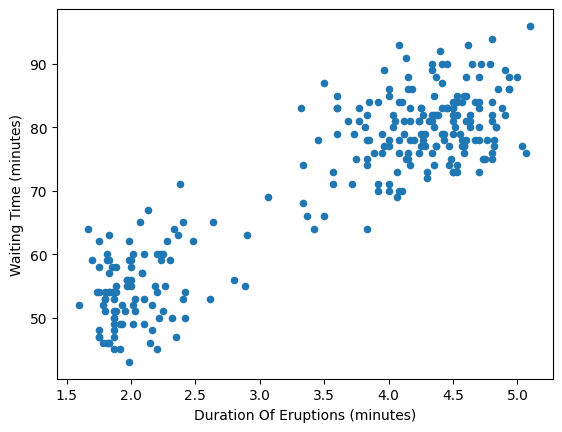

In [108]:

def plot_scatter():
    df_scatter = df.plot.scatter(x ="eruptions", y= "waiting")
    df_scatter.set_xlabel("Duration Of Eruptions (minutes)")
    df_scatter.set_ylabel("Waiting Time (minutes)")

plot_scatter()

Yes, I definetly do think there is a relationship between waiting time and eruption time, as the duration of eruptioins increased the waiting time between also increased

(1b)

In [97]:
df_means= df.mean(axis = 0)
eruptions_mean = df_means.iloc[0] 
waiting_mean = df_means.iloc[1]


print(eruptions_mean,waiting_mean)

centered_df= df.copy() # centered_df
centered_df["X"] = centered_df["eruptions"] - eruptions_mean
centered_df["Y"] = centered_df["waiting"] - waiting_mean

centered_X = np.asarray(centered_df["X"])
centered_Y = np.asarray(centered_df["Y"])

3.4877830882352936 70.8970588235294


(1c)

In [93]:
# functino take in 2 numpy arrays

def innerproduct(x,y):
    return np.sum(x*y)

def magnitude(x):
    return math.sqrt(np.sum(x ** 2))

def correlation(x,y):
    return innerproduct(x,y)/(magnitude(x)*magnitude(y))

eruptions_arr =  np.asarray(centered_df["eruptions"])
waiting_arr = np.asarray(centered_df["waiting"])

(1d)

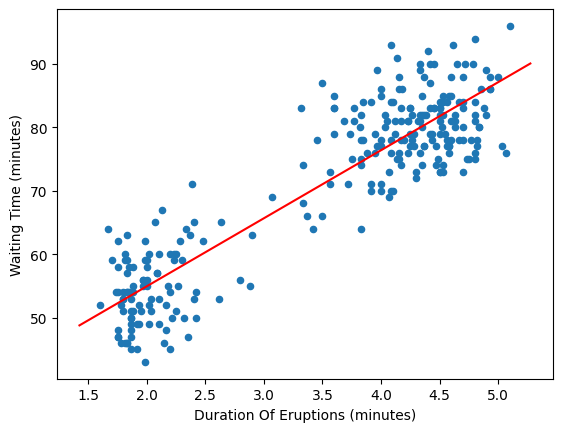

In [109]:
def slope(x_center,y_center):
    return(innerproduct(x_center,y_center)/(magnitude(x_center) ** 2))


def yint(x_mean,y_mean,x_center,y_center):
    return y_mean - slope(x_center,y_center)*x_mean

df_slope = slope(centered_df['X'],centered_df["Y"])
df_yint = yint(eruptions_mean,waiting_mean,centered_X,centered_Y)




##found this function on stackoverflow link is here: https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept ##
def plotreg(slope, intercept):
    plot_scatter()
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color = 'red')

plotreg(df_slope,df_yint)